# Chapter #2: Combining Dates and Times

In [1]:
# Import all necessary variables
from assets import onebike_datetimes

## 1. Dates and times

**1. Adding time to the mix**
> In this chapter, you are going to move from only working with dates to working with both dates and times: the calendar day AND the time on the clock within that day.

**2. Dates and Times**
> As always, let's start with an example. Here is an example of a date and a time together: October 1, 2017, at 3:23:25 PM. Unlike before, where we were only working with the date, we're now going to also include the time. Let's see how to represent this in Python.

>> 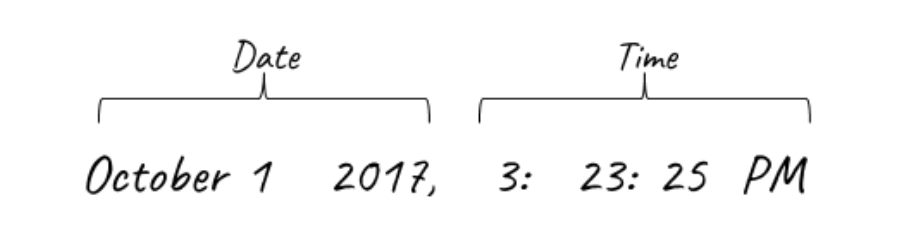

**3. Dates and Times**
> The first thing we have to do is import the datetime class from the datetime package. Ideally, these would have different names, but unfortunately for historical reasons they have the same name. This is just something to get used to.

>> 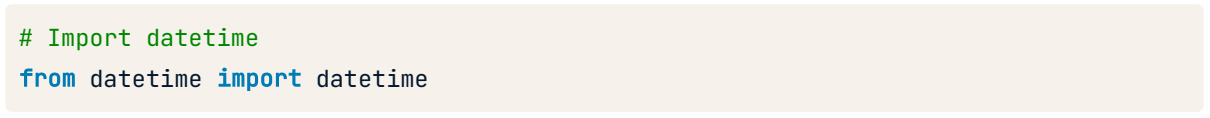

**4. Dates and Times**
> We're going to create a datetime called `dt` and populate the fields together.

>> 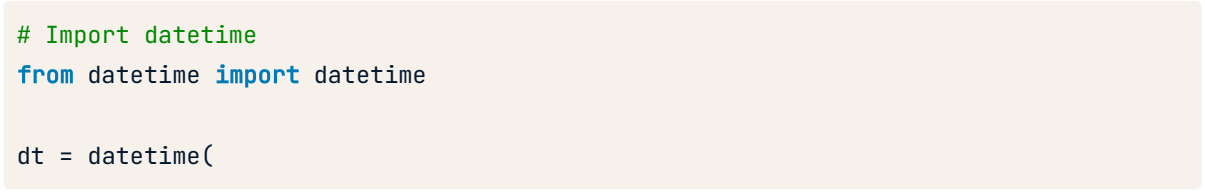

**5. Dates and Times**
> The first three arguments to the datetime class are exactly the same as the date class. Year, then month, then day, each as a number.

>> 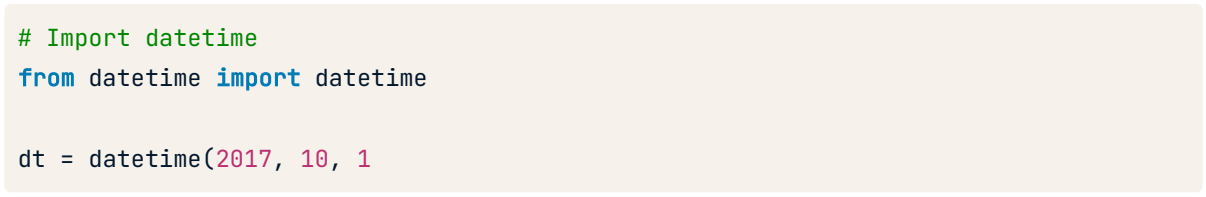

**6. Dates and Times**
> Next, we fill in the hour. Computers generally use 24 hour time, meaning that 3 PM is represented as hour 15 of 24.

>> 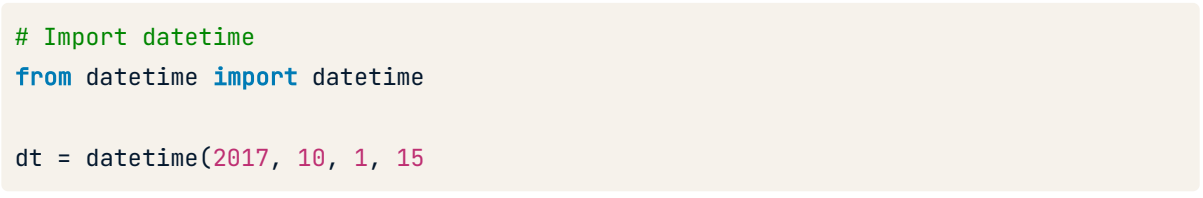

**7. Dates and Times**
> We put in the minutes, 23 out of 60.

>> 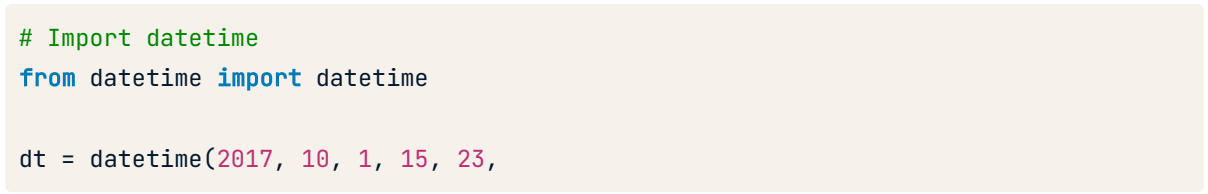

**8. Dates and Times**
> And finally, the seconds. October 1, 2017 at 3:23:25PM is represented as a datetime in Python as 2017, 10, 1, 15, 23, 25). All of these arguments need to be whole numbers; if you want to represent point-5 seconds,

>> 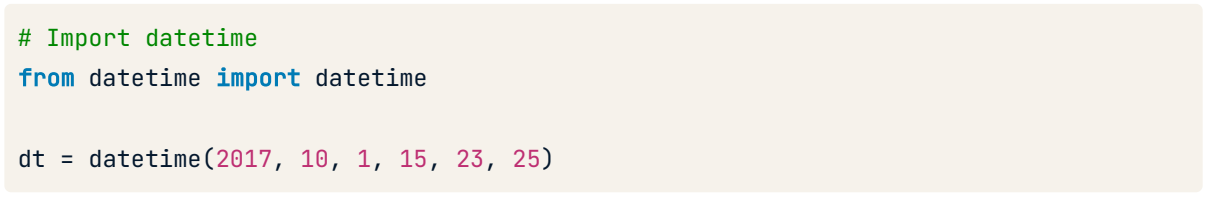

**9. Dates and Times**
> you can add microseconds to your datetime. Here we've added 500,000 microseconds, or point-5 seconds. That is, Python breaks seconds down into millionths of a second for you when you need that kind of precision. If you need billionths of a second precision (which happens sometimes in science and finance) we'll cover nanoseconds when we get to Pandas at the end of this course. Python defaults to 0 microseconds if you don't include it.

>> 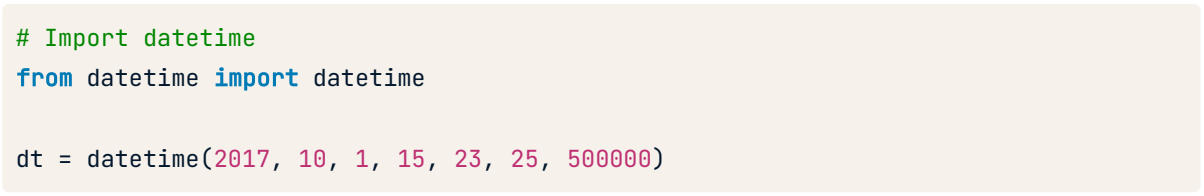

**10. Dates and Times**
> That's a lot of arguments; if it helps, you can always be more explicit and use named arguments.

>> 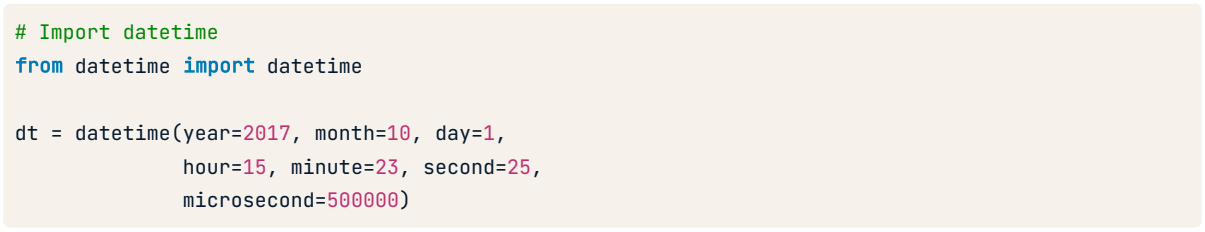

**11. Replacing parts of a datetime**
> We can also make new datetimes from existing ones by using the replace() method. For example, we can take the datetime we just made, and make a new one which has the same date but is rounded down to the start of the hour. We call dt-dot-replace() and set minutes, seconds, and microseconds to 0. This creates a new datetime with the same values in all the other fields, but these ones changed.

>> 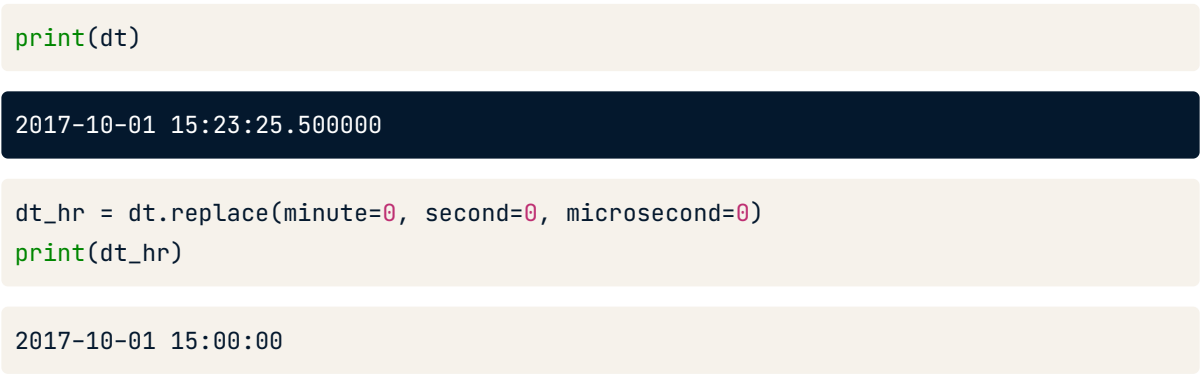

**12. Capital Bikeshare**
> Before we wrap up, let's talk about the data we will use for the rest of this course. You will be working with data from Capital Bikeshare, the oldest municipal shared bike program in the United States. Throughout the Washington, DC area, you will find these special bike docks, where riders can pay to take a bike, ride it, and return to this or any other station in the network. We will be following one bike, ID number "W20529", on all the trips it took in October, November, and December of 2017. Each trip consisted of a date and time when a bike was undocked from a station, then some time passed, and the date and time when W20529 was docked again.

**13. Adding time to the mix**
> In this video, we walked through how to create datetime objects in Python. You're going to practice that in the exercises, and also work with the Capital Bikeshare data and see how we can use Python to understand the trips that W20529 took throughout the three months we're interested in.

### 1.1. Creating datetimes by hand

> Often you create `datetime` objects based on outside data. Sometimes though, you want to create a `datetime` object from scratch.

> You're going to create a few different `datetime` objects from scratch to get the hang of that process. These come from the bikeshare data set that you'll use throughout the rest of the chapter.

>> - Import the `datetime` class.
>> - Create a `datetime` for October 1, 2017 at 15:26:26.
>> - Print the results in ISO format.

In [2]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-10-01T15:26:26


>> - Import the `datetime` class.
>> - Create a `datetime` for December 31, 2017 at 15:19:13.
>> - Print the results in ISO format.

In [3]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-12-31T15:19:13


>> - Create a new `datetime` by replacing the year in dt with 1917 (instead of 2017).

In [4]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old.isoformat())

1917-12-31T15:19:13


### 1.2. Counting events before and after noon

> In this chapter, you will be working with a list of all bike trips for one Capital Bikeshare bike, W20529, from October 1, 2017 to December 31, 2017. This list has been loaded as `onebike_datetimes`.

> Each element of the list is a dictionary with two entries: `start` is a datetime object corresponding to the start of a trip (when a bike is removed from the dock) and `end` is a `datetime` object corresponding to the end of a trip (when a bike is put back into a dock).

> You can use this data set to understand better how this bike was used. Did more trips start before noon or after noon?

>> - Within the `for` loop, complete the `if` statement to check if the trip started before noon.
>> - Within the `for` loop, increment `trip_counts['AM']` if the trip started before noon, and `trip_counts['PM']` if it started after noon.

In [5]:
# Explore onebike_datetimes
print(onebike_datetimes[0])

{'start': datetime.datetime(2017, 10, 1, 15, 23, 25), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26)}


In [6]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
    # Check to see if the trip starts before noon
    if trip['start'].hour < 12:
    # Increment the counter for before noon
        trip_counts['AM'] += 1
    else:
        # Increment the counter for after noon
        trip_counts["PM"] += 1
  
print(trip_counts)

{'AM': 94, 'PM': 196}


## 2. Printing and parsing datetimes

**1. Printing and parsing datetimes**
> Much like dates, datetimes can be printed in many ways. Python also has another trick: you can take a string and turn it directly into a datetime. Let's start with printing dates and then move on to asking Python to parse them.

**2. Printing datetimes**
> First, let's create a datetime again. dt corresponds to December 30, 2017 at 15:19:13, the end of the last trip that W20529 takes in our data set. Just like with date objects, we use `strftime()` to create a string with a particular format. First, we'll just print the year, month and date, using the same format codes we used for dates. `%` capital `Y` stands for the four digit year, `%` lowercase `m` for the month, and `%` lowercase `d` for the day of the month. Now we can add in the hours, minutes and seconds. Again, we print the year, month and day, and now we add three more format codes: `%` capital `H` gives us the hour, `%` capital `M` gives us the minute, and `%` capital `S` gives us the seconds. There are also format codes for 12-hour clocks, and for printing the correct AM or PM.

>> 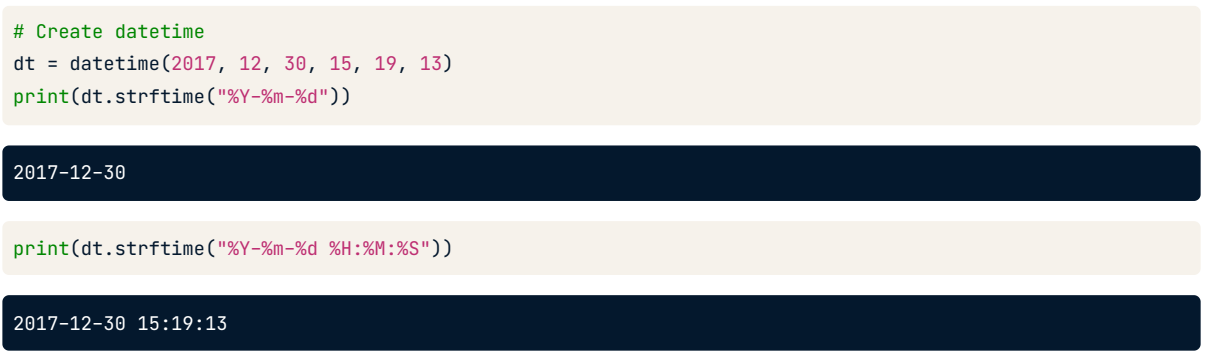

**3. Printing datetimes**
> As before, we can make these formatting strings as complicated as we need. Here's another version of the previous string.

>> 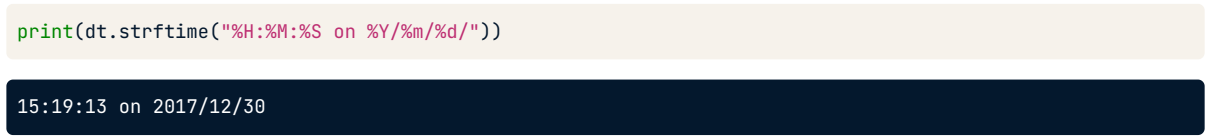

**4. ISO 8601 Format**
> Finally, we can use the isoformat() method, just like with dates, to get a standards-compliant way of writing down a datetime. The officially correct way of writing a datetime is the year, month, day, then a capital T, then the time in 24 hour time, followed by the minute and second. When in doubt, this is a good format to use.

>> 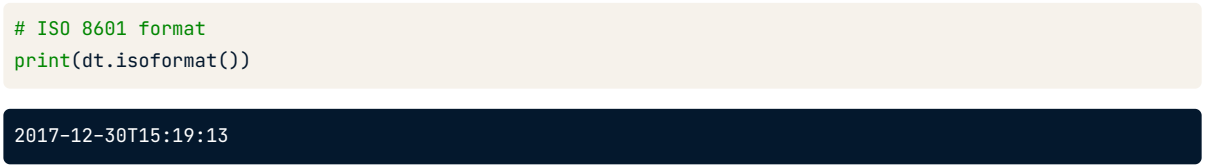

**5. Parsing datetimes with strptime**
> We can also parse dates from strings, using the same format codes we used for printing. You'll use this often when getting date and time data from the Internet since dates and times are often represented as strings. We start, as before, by importing the datetime class.

>> 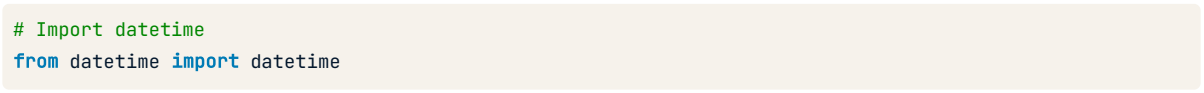

**6. Parsing datetimes with strptime**
> The method we're going to use is called `strptime()`, which is short for string parse time. `strptime()` takes two arguments: the first argument is the string to turn into a datetime, and the second argument is the format string that says how to do it.

>> 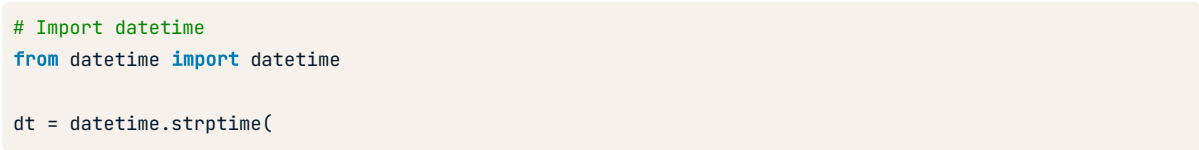

**7. Parsing datetimes with strptime**
> First we pass the string we want to parse. In this case, a string representing December 30, 2017, at 15:19:13.

>> 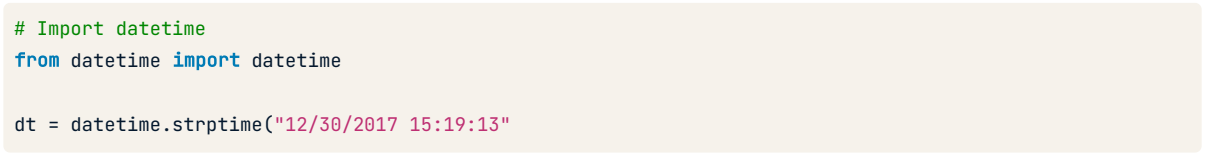

**8. Parsing datetimes with strptime**
> Then we pass the format string, which as mentioned before uses the same format codes we used with `strftime()`. In this case, first the month, then the day, then the year, all separated by slashes, then a space, and then the hour, minutes, and seconds separated by colons. You usually need to figure this out once per data set.

>> 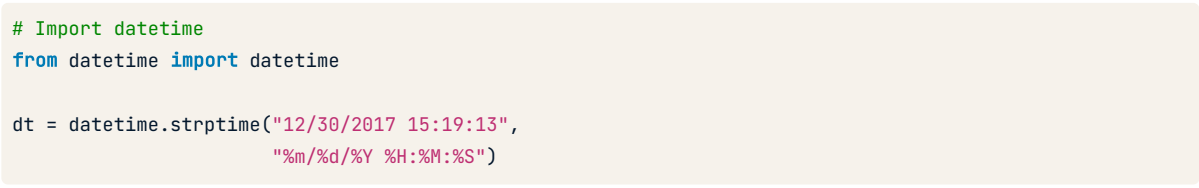

**9. Parsing datetimes with strptime**
> If we look and see what kind of object we've made, by printing the type of dt, we see that we've got a datetime. And if we print that datetime, we get a string representation of the datetime. We can see that the parsing worked correctly.

>> 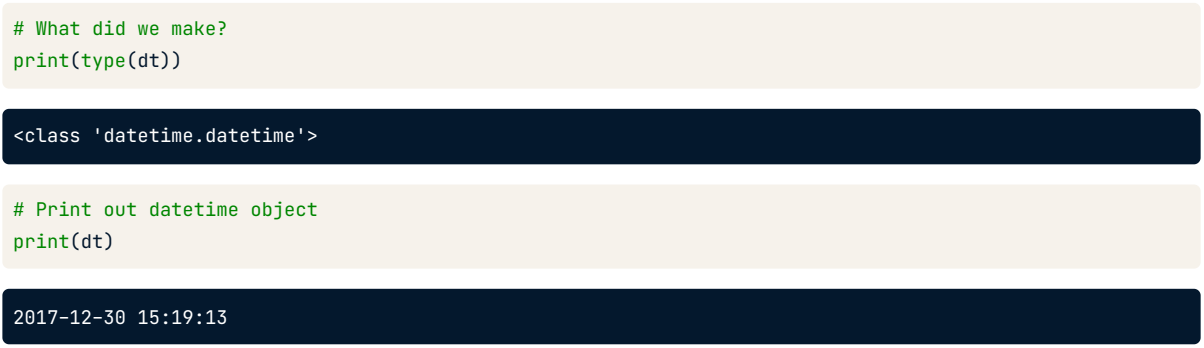

**10. Parsing datetimes with strptime**
> We need an exact match to do a string conversion. For example, if we leave out how to parse the time, Python will throw an error. And similarly, if there is an errant comma or other symbols, `strptime()` will not be happy.

>> 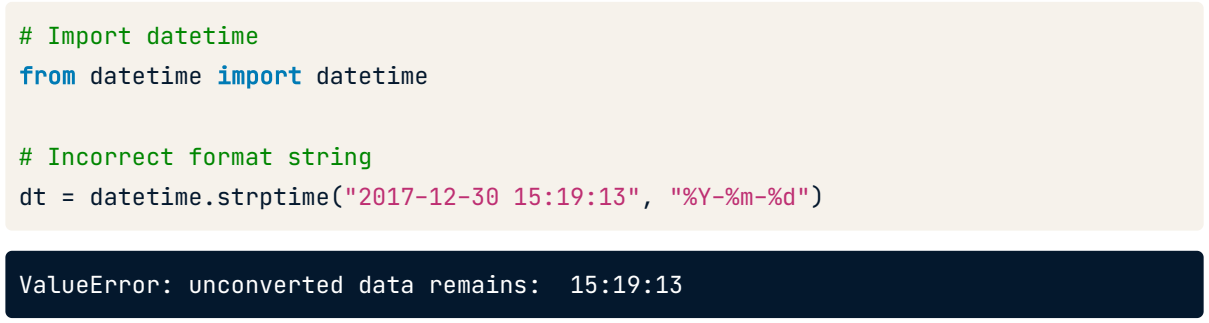

**11. Parsing datetimes with Python**
> Finally, there is another kind of datetime you will sometimes encounter: the Unix timestamp. Many computers store datetime information behind the scenes as the number of seconds since January 1, 1970. This date is largely considered the birth of modern-style computers. To read a Unix timestamp, use the `datetime.fromtimestamp()` method. Python will read your timestamp and return a datetime.

>> 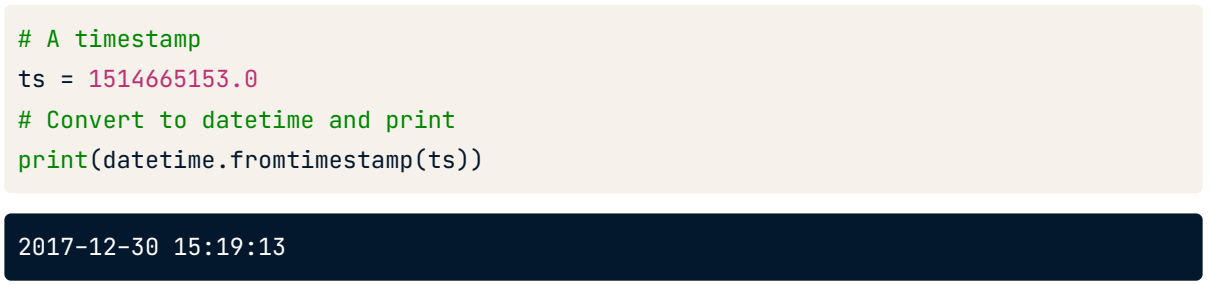

**12. Printing and parsing datetimes**
> We've just covered how to use format codes to turn datetimes into strings and strings into datetimes, and what ISO 8601 format looks like with time involved. Now you'll practice moving back and forth between strings and datetimes.

### 2.1. Turning strings into datetimes

> When you download data from the Internet, dates and times usually come to you as strings. Often the first step is to turn those strings into datetime objects.

> In this exercise, you will practice this transformation.

>> 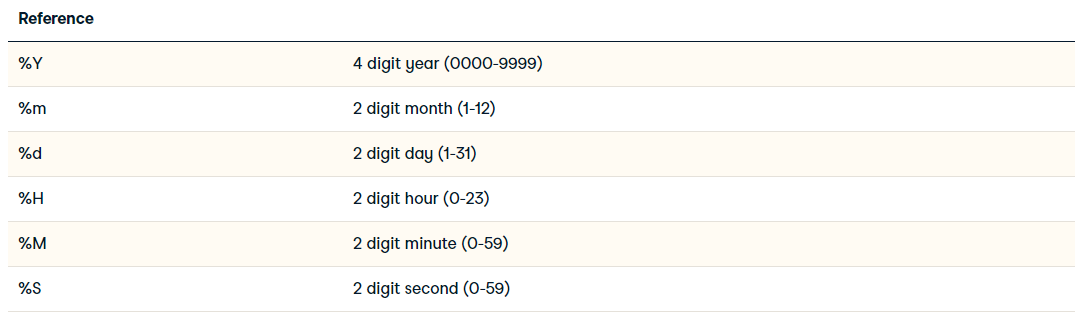

>> - Determine the format needed to convert `s` to datetime and assign it to `fmt`.
>> - Convert the string `s` to datetime using `fmt`.

In [7]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


>> - Determine the format needed to convert `s` to datetime and assign it to `fmt`.
>> - Convert the string `s` to datetime using `fmt`.

In [8]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD format
s = '2030-10-15'

# Write a format string to parse s
fmt = '%Y-%m-%d'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2030-10-15 00:00:00


>> - Determine the format needed to convert `s` to datetime and assign it to `fmt`.
>> - Convert the string `s` to datetime using `fmt`.

In [9]:
# Import the datetime class
from datetime import datetime

# Starting string, in MM/DD/YYYY HH:MM:SS format
s = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

1986-12-15 08:00:00
